Hello students! This task involves training and evaluating a neural network model for image classification and rewards 1 bonus point upon fullfilment

## Load Dataset

100%|██████████| 26421880/26421880 [00:03<00:00, 7918792.10it/s] 


Extracting ./F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./F_MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 143951.05it/s]


Extracting ./F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./F_MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2726799.35it/s]


Extracting ./F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./F_MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19755056.72it/s]


Extracting ./F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./F_MNIST_data/FashionMNIST/raw



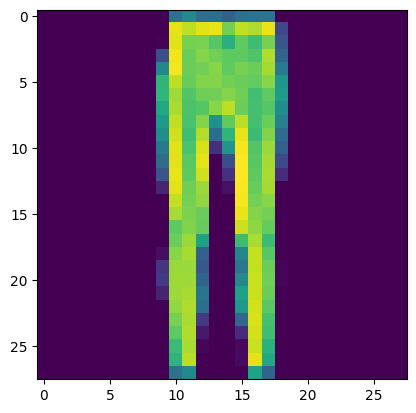

In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
#import helper
import matplotlib.pyplot as plt
import numpy as np

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('./F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('./F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

#The code then selects a random image and label from the training set using the next
# and iter functions on the trainloader and displays the image using matplotlib.
image, label = next(iter(trainloader)) 

plt.imshow(np.squeeze(image[3,:]));  # Note that the squeeze function is used to remove any dimensions of size 1 from the tensor, 
# so that the image can be displayed properly by imshow.

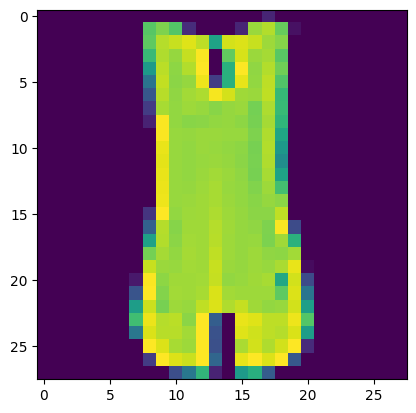

In [2]:
plt.imshow(trainset[4][0][0])

In [3]:
trainset


Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./F_MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [4]:
print(label)
print(f'Name of classes = {np.unique(label)}')
print(f'Number of classes = {len(np.unique(label))}')

tensor([4, 7, 5, 1, 9, 3, 0, 3, 0, 5, 1, 5, 7, 9, 1, 5, 1, 9, 9, 2, 0, 6, 9, 7,
        6, 9, 4, 2, 6, 5, 7, 8, 3, 2, 8, 1, 3, 3, 7, 0, 5, 1, 1, 0, 0, 5, 2, 0,
        9, 3, 8, 8, 0, 1, 7, 5, 6, 5, 9, 6, 7, 8, 3, 3])
Name of classes = [0 1 2 3 4 5 6 7 8 9]
Number of classes = 10


## Build a network

In [5]:
import torch.nn as nn
from collections import OrderedDict


model = nn.Sequential(OrderedDict([
                                   ('fc1',nn.Linear(784,256)),
                                   ('relu1',nn.ReLU()),
                                   ('fc2',nn.Linear(256,64)),
                                   ('relu2',nn.ReLU()),
                                   ('fc3',nn.Linear(64,10)),
                                   ('logmax',nn.LogSoftmax(dim=1))]))

In [6]:
model5 = nn.Sequential(OrderedDict([
                                    ('fc1',nn.Conv2d(1, 6, 5, padding=2)),
                                    ('relu1',nn.ReLU()),
                                    ('pool1',nn.MaxPool2d(2, stride=2)),

                                    ('fc2',nn.Conv2d(6, 16, 5, padding=0)),
                                    ('relu2',nn.ReLU()),
                                    ('pool2',nn.MaxPool2d(2, stride=2)),

                                    ('flatten', nn.Flatten()),

                                    ('fc3',nn.Linear(400,120)),
                                    ('fc4',nn.Linear(120,84)),
                                    ('fc5',nn.Linear(84,10))]))

def validate(model, data):
    total = 0
    correct = 0
    for i, (images,labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        
        value, pred = torch.max(x,1)
        pred = pred.data.cpu()      #to convert back the tensor to cpu to compare with labels which are also on cpu
        #pred = pred.data

        total += x.size(0)
        correct += torch.sum(pred== labels)
    
    return correct*100./total

def validate_ANN(model, data1):
    total = 0
    correct = 0
    for i, (images,labels) in enumerate(data1):
        images = images.resize_(1, 784)
        x = model(images)
        ps = torch.exp(model(images))
        value, pred = torch.max(ps.data,1) 
        pred = pred.data
        total += labels.size(0)       
       
        correct += torch.sum(pred== labels)
    return correct*100./total



In [41]:
def acrcy_ann(model, data):
    model.eval()  # Set model to evaluation mode

    num_correct = 0
    num_total = 0

    with torch.no_grad():  # Disable gradient computation
        for inputs, labels in data:
            inputs = inputs.resize_(1, 784)
            outputs = model(inputs)  # Forward pass
            _, predicted = torch.max(outputs, dim=1)  # Get predicted labels
            num_correct += (predicted == labels).sum().item()  # Count correct predictions
            num_total += len(labels)  # Count total predictions

    accuracy = num_correct / num_total
    print(f"Accuracy: {accuracy:.4f}")
    return accuracy

In [42]:
acur = acrcy_ann(model, trainloader)

Accuracy: 0.1161


In [7]:
if torch.cuda.is_available():                         # commands to run when connected to local
    device = torch.device("cuda:0") 
else:
    device = torch.device("cpu")

In [8]:
device     # commands to run when connected to local

device(type='cuda', index=0)

## Network N-2

In [9]:
model4 = nn.Sequential(
    nn.Conv2d(1, 6, 5, padding=2), #input shape(1,28,28)
    nn.ReLU(),
    nn.AvgPool2d(2, stride=2),    #output shape(6, 14,14)

    nn.Conv2d(6, 16, 5, padding=0),  #input shape = (6,14,14)
    nn.ReLU(),
    nn.AvgPool2d(2, stride=2),    # output shaep = (16,5,5 )    16*5*5=400
 
    nn.Flatten(),
    nn.Linear(400, 120),
    nn.Linear(120, 84),
    nn.Linear(84, 10)
)


# **Training On DEFINED NETWORK**

In [34]:
# Create the network, define the criterion and optimizer
from torch import optim


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# TODO: Train the network here
epochs = 100
loss_ann = []
accuracies_ann = []
print ('Defined ANN model Traning has started.')
for j in range(epochs):
    
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
         accuracy = float(validate_ANN(model,testloader))
         print(f"Epoch {j+1} -->>> Training Loss: {round(running_loss/len(trainloader), 3)} -->>> Validation Accuracy = {round(accuracy, 3)}")
         loss1 = running_loss/len(trainloader)
         loss_ann.append(loss1)
         accuracies_ann.append(accuracy)

Defined ANN model Traning has started.
Epoch 1 -->>> Training Loss: 0.297 -->>> Validation Accuracy = 11.15
Epoch 2 -->>> Training Loss: 0.291 -->>> Validation Accuracy = 11.7
Epoch 3 -->>> Training Loss: 0.287 -->>> Validation Accuracy = 10.94
Epoch 4 -->>> Training Loss: 0.282 -->>> Validation Accuracy = 11.03
Epoch 5 -->>> Training Loss: 0.276 -->>> Validation Accuracy = 11.54
Epoch 6 -->>> Training Loss: 0.272 -->>> Validation Accuracy = 11.05
Epoch 7 -->>> Training Loss: 0.268 -->>> Validation Accuracy = 10.48
Epoch 8 -->>> Training Loss: 0.264 -->>> Validation Accuracy = 11.48
Epoch 9 -->>> Training Loss: 0.26 -->>> Validation Accuracy = 11.26
Epoch 10 -->>> Training Loss: 0.256 -->>> Validation Accuracy = 11.07
Epoch 11 -->>> Training Loss: 0.251 -->>> Validation Accuracy = 11.2
Epoch 12 -->>> Training Loss: 0.247 -->>> Validation Accuracy = 11.83
Epoch 13 -->>> Training Loss: 0.244 -->>> Validation Accuracy = 10.89
Epoch 14 -->>> Training Loss: 0.239 -->>> Validation Accuracy =

In [36]:
model_save_name = 'model.pt'
path = F"/content/drive/My Drive/Unsupervised Deep Learning/{model_save_name}" 
torch.save(model.state_dict(), path)


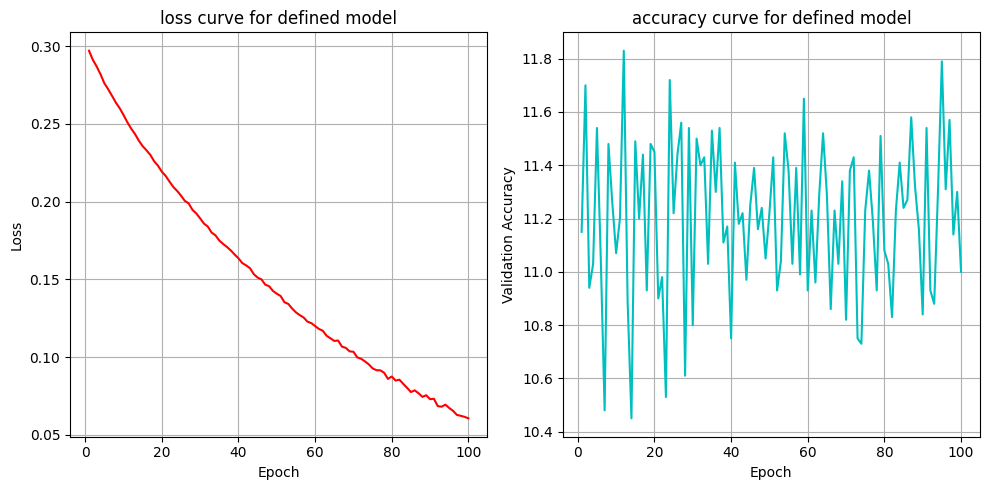

In [35]:
import numpy as np
import matplotlib.style as style
y_ = np.array(list(range(1,101)))
df_2 = accuracies_ann
df_1 = loss_ann
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(10,5))
titles = ['loss curve for defined model', 'accuracy curve for defined model']
ytitle = ['Loss', 'Validation Accuracy']
color = ['r', 'c']
for i, ax in enumerate(fig.axes, start=1):
  df = globals()[f'df_{i}']   
  ax.plot(y_,df, color=color[i-1])
  ax.set_xlabel('Epoch')
  ax.set_ylabel(ytitle[i-1])
  ax.set_title(titles[i-1])
  ax.grid(True)
fig.tight_layout()

# **Training on CNN Network_1**

In [10]:
# Create the network, define the criterion and optimizer
from torch import optim

model5 = model5.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model5.parameters(), lr=0.01)

# TODO: Train the network here
epochs = 100
accuracies1 = []
loss1 = []
print('CNN model training is in progress')
for j in range(epochs):
    #print ('epoch:',j)
    running_loss = 0
    for i, (imagess, labelss) in enumerate(trainloader):
        train_img = imagess.to(device)
        train_label = labelss.to(device)
        optimizer.zero_grad()   # set all the gradients back to zero
        output = model5(train_img)
        loss = criterion(output,train_label)   # losss
        loss.backward()           # calculate the gradients
        optimizer.step()          # update the weights
        running_loss += loss.item()
        #accuracy = float(validate(model3, testloader))
    else:
        accuracy1 = float(validate(model5, testloader))
        print(f"Epoch {j} -->>> Training Loss: {running_loss/len(trainloader)} -->>> Validation Accuracy = {accuracy1}")
        cse = running_loss/len(trainloader)
        loss1.append(cse)
        accuracies1.append(accuracy1)
#Plot the training loss curve

CNN model training is in progress
Epoch 0 -->>> Training Loss: 1.2938865164259095 -->>> Validation Accuracy = 71.94999694824219
Epoch 1 -->>> Training Loss: 0.5956343812093552 -->>> Validation Accuracy = 79.93000030517578
Epoch 2 -->>> Training Loss: 0.5170990329053102 -->>> Validation Accuracy = 81.58000183105469
Epoch 3 -->>> Training Loss: 0.4720200569486059 -->>> Validation Accuracy = 82.30999755859375
Epoch 4 -->>> Training Loss: 0.44084709877970374 -->>> Validation Accuracy = 83.5
Epoch 5 -->>> Training Loss: 0.414628520242568 -->>> Validation Accuracy = 85.18000030517578
Epoch 6 -->>> Training Loss: 0.39392991681724215 -->>> Validation Accuracy = 84.30999755859375
Epoch 7 -->>> Training Loss: 0.37739590452169813 -->>> Validation Accuracy = 86.16000366210938
Epoch 8 -->>> Training Loss: 0.3637121837022208 -->>> Validation Accuracy = 84.94000244140625
Epoch 9 -->>> Training Loss: 0.35082576348424466 -->>> Validation Accuracy = 86.29000091552734
Epoch 10 -->>> Training Loss: 0.3394

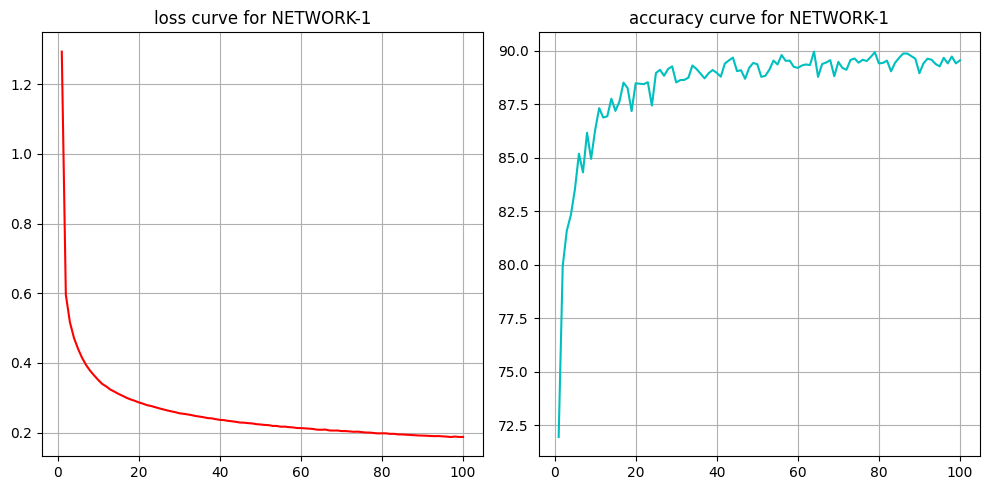

In [19]:
import numpy as np
import matplotlib.style as style
y_ = np.array(list(range(1,101)))
df_2 = accuracies1
df_1 = loss1
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(10,5))
titles = ['loss curve for NETWORK-1', 'accuracy curve for NETWORK-1']
color = ['r', 'c']
for i, ax in enumerate(fig.axes, start=1):
  df = globals()[f'df_{i}']   
  ax.plot(y_,df, color=color[i-1])
  ax.set_title(titles[i-1])
  ax.grid(True)
fig.tight_layout()

In [15]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
model_save_name = 'model5.pt'
path = F"/content/drive/My Drive/Unsupervised Deep Learning/{model_save_name}" 
torch.save(model5.state_dict(), path)



#model_save_name = 'classifier.pt'
#path = F"/content/gdrive/My Drive/{model_save_name}"             to load the model
#model.load_state_dict(torch.load(path))

# **Training for Network-2**

In [17]:
# Create the network, define the criterion and optimizer
from torch import optim

model4 = model4.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model4.parameters(), lr=0.01)

# TODO: Train the network here
epochs = 100
accuracies2 = []
loss2 = []
print('CNN model-2 training is in progress')
for j in range(epochs):
    #print ('epoch:',j)
    running_loss = 0
    for i, (imagess, labelss) in enumerate(trainloader):
        train_img = imagess.to(device)
        train_label = labelss.to(device)
        optimizer.zero_grad()   # set all the gradients back to zero
        output = model4(train_img)
        loss = criterion(output,train_label)   # losss
        loss.backward()           # calculate the gradients
        optimizer.step()          # update the weights
        running_loss += loss.item()
        #accuracy = float(validate(model3, testloader))
    else:
        accuracy2 = float(validate(model4, testloader))
        print(f"Epoch {j} -->>> Training Loss: {running_loss/len(trainloader)} -->>> Validation Accuracy = {accuracy2}")
        cse = running_loss/len(trainloader)
        loss2.append(cse)
        accuracies2.append(accuracy2)
#Plot the training loss curve

CNN model-2 training is in progress
Epoch 0 -->>> Training Loss: 1.2672605141520754 -->>> Validation Accuracy = 71.95999908447266
Epoch 1 -->>> Training Loss: 0.69505643765174 -->>> Validation Accuracy = 75.08000183105469
Epoch 2 -->>> Training Loss: 0.6211801639307283 -->>> Validation Accuracy = 69.33999633789062
Epoch 3 -->>> Training Loss: 0.565924832053276 -->>> Validation Accuracy = 78.69999694824219
Epoch 4 -->>> Training Loss: 0.5277863483566211 -->>> Validation Accuracy = 79.80999755859375
Epoch 5 -->>> Training Loss: 0.4983425761050761 -->>> Validation Accuracy = 80.80999755859375
Epoch 6 -->>> Training Loss: 0.47539586224345004 -->>> Validation Accuracy = 82.2699966430664
Epoch 7 -->>> Training Loss: 0.45849195666023407 -->>> Validation Accuracy = 82.7300033569336
Epoch 8 -->>> Training Loss: 0.44434651462381075 -->>> Validation Accuracy = 82.83999633789062
Epoch 9 -->>> Training Loss: 0.4306689149884781 -->>> Validation Accuracy = 82.37000274658203
Epoch 10 -->>> Training Lo

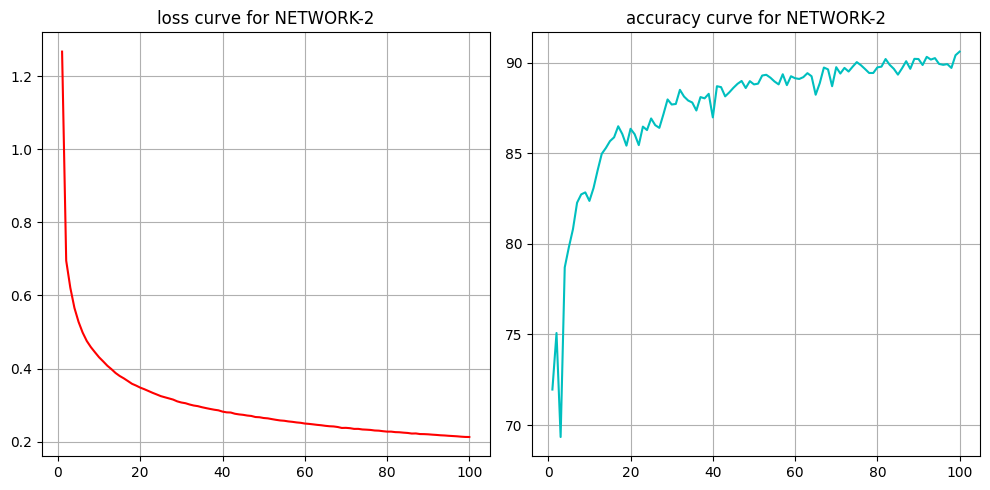

In [18]:
import numpy as np
import matplotlib.style as style
y_ = np.array(list(range(1,101)))
df_2 = accuracies2
df_1 = loss2
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(10,5))
titles = ['loss curve for NETWORK-2', 'accuracy curve for NETWORK-2']
color = ['r', 'c']
for i, ax in enumerate(fig.axes, start=1):
  df = globals()[f'df_{i}']   
  ax.plot(y_,df, color=color[i-1])
  ax.set_title(titles[i-1])
  ax.grid(True)
fig.tight_layout()

In [22]:
model_save_name = 'model4.pt'
path = F"/content/drive/My Drive/Unsupervised Deep Learning/{model_save_name}" 
torch.save(model4.state_dict(), path)

## Test the Network

Labels

0 T-shirt/top

1 Trouser


2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [105]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#model5 = 'model5.pt'
#path = F"/content/drive/My Drive/{model_save_name}"             to load the model5   Network_1
#model.load_state_dict(torch.load(path))

#model4 = 'model4.pt'
#path = F"/content/drive/My Drive/{model_save_name}"             to load the model4   Network_2
#model.load_state_dict(torch.load(path))

#model = 'model.pt'
#path = F"/content/drive/My Drive/{model_save_name}"             to load the model    ANN Defined Network
#model.load_state_dict(torch.load(path))

def predictby_ann(index, model):
    %matplotlib inline
    %config InlineBackend.figure_format = 'retina'
    dataiter = iter(testloader)
    images, labels = next(iter(testloader))
    img = images[index]
    # Convert 2D image to 1D vector
    img = img.resize_(1, 784)
    # Calculate the class probabilities (softmax) for image
    ps = torch.exp(model(img))
    plt.imshow(np.squeeze(images[index]))
    #print(ps)
    names = label_names[int(ps[0][index].item())]
    print(f'Predicted image label is {names}')
    print('Accuraccy is low so the model sometime not predicting the proper image label.')
    print('')

def predict_img(index, model):
    %matplotlib inline
    %config InlineBackend.figure_format = 'retina'
    dataiter = iter(testloader)
    images, labels = next(iter(testloader))
    images = images.cuda()
    img = images
    x = model(img)
    value, pred = torch.max(x,1)
    pred = pred.data.cpu()
    name = label_names[pred[index]]
    print(f'Predicted label for the image is {name}')
    print('')
    plt.imshow(np.squeeze(images[index].cpu()))

Prediction using model which is Defined ANN Network

Predicted image label is T-shirt/top
Accuraccy is low so the model sometime not predicting the proper image label.



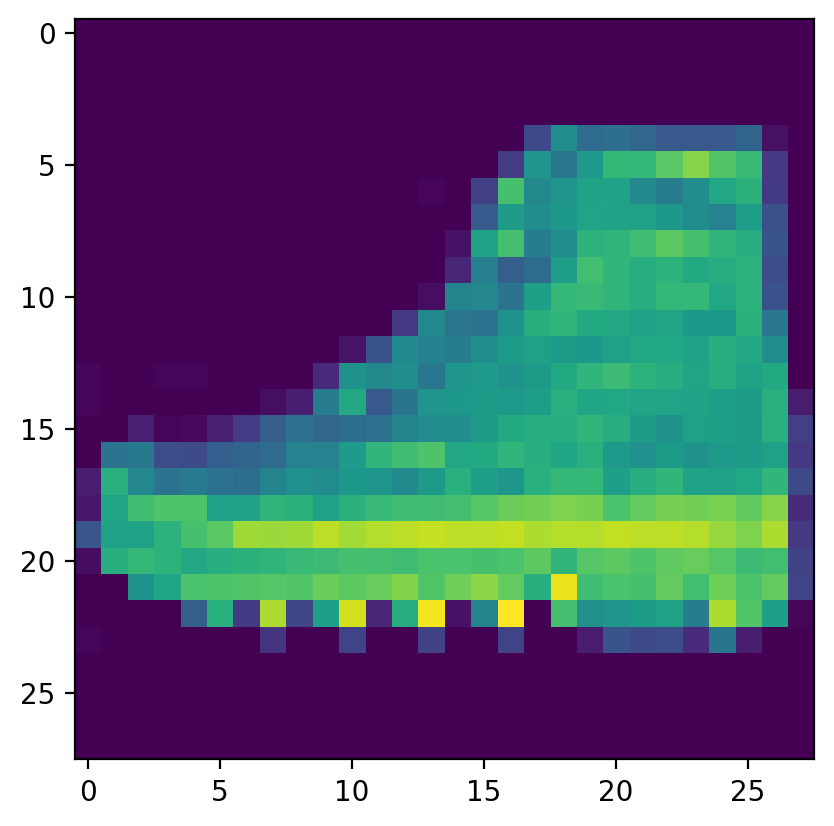

In [106]:
print('Prediction using model which is Defined ANN Network')
print('')
predictby_ann(3,model)

Prediction using model5 which is Network_1

Predicted label for the image is Pullover



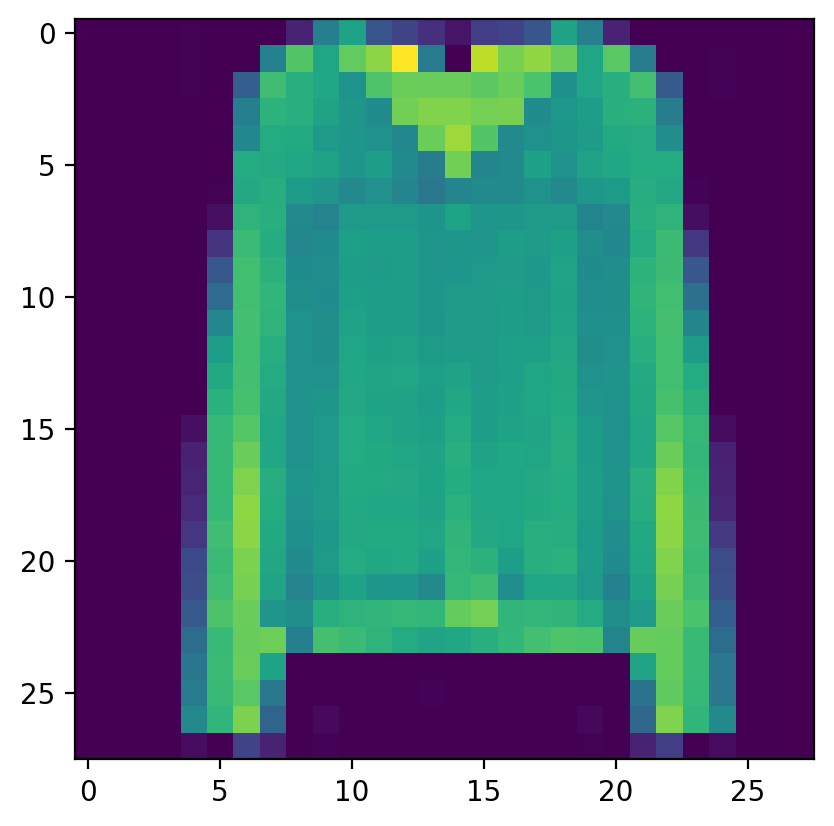

In [107]:
print('Prediction using model5 which is Network_1')
print('')
predict_img(1, model5)

Prediction using model5 which is Network_2

Predicted label for the image is Bag



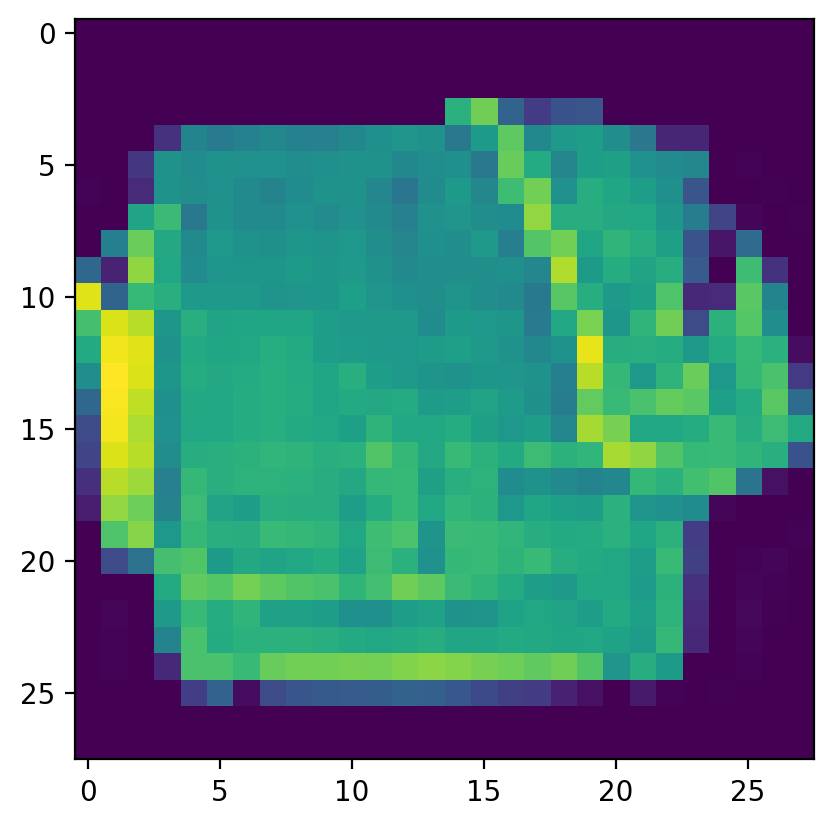

In [108]:
print('Prediction using model5 which is Network_2')
print('')
predict_img(1, model4)  

## TODO:

**What is the architecture of the above defined network?**

Answer: The defined network contains input, output and hidden layers through which data or caslculation flows. Thus the Architecture of the defined network is Artificial Neural Network.


---


**How many classes does the training set have?**

Answer: Training set contains 10 classes.

---



Build a convolutional neural network (Network_1) by replacing fc1 and fc2 layers in above defined network with convolutional layers of different kernel sizes and strides. Finally, add a max pooling operation after both convolutional layers.

Build a convolutional neural network(Network_2) by replacing max pooling operation with average pooling in Network_1 after both convolutional layers.

Train the both convolutional neural networks (Network_1 & Network_2). Plot the loss curves.

---




***Test the convolutional neural networks(Network_1 & Network_2) and calculate the test classification accuracy of both networks and compare with the defined network***

Answer: Taking into consideration of accuracy of defined network and accuracy of CNN network, CNN model is performing the best and giving validation accuracy around 90% which is far better than defined model.

Note: Train the networks for atleast 100 epochs

In [25]:
import numpy as np
import pandas as pd
# confusion matrix
def predict_dl(model, data):
   y_pred = []
   y_true = []
   for i, (images, labels) in enumerate(data):
      images = images.cuda()
      x = model(images)
      value, pred = torch.max(x,1)
      pred = pred.data.cpu()
      y_pred.extend(list(pred.numpy()))
      y_true.extend(list(labels.numpy()))
   return np.array(y_pred), np.array(y_true)

In [29]:
from sklearn.metrics import confusion_matrix
y_pred, y_true = predict_dl(model5, testloader)
cf = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=np.arange(0,10)))
print('Confusion Matrix for Network_1')
print('')
print(cf)

Confusion Matrix for Network_1

     0    1    2    3    4    5    6    7    8    9
0  810    1   28   22    4    0  124    1   10    0
1    2  976    2   10    6    0    2    0    2    0
2   12    0  830    6   90    1   58    0    3    0
3   15    3   14  882   51    0   34    0    1    0
4    0    0   35   14  900    0   51    0    0    0
5    0    0    0    1    0  959    0   24    5   11
6   90    0   60   20  129    0  694    0    7    0
7    0    0    0    0    0    7    0  978    0   15
8    4    1    7    4    3    4    3    3  970    1
9    0    0    0    0    0    6    1   37    1  955


In [31]:
from sklearn.metrics import confusion_matrix
y_pred, y_true = predict_dl(model4, testloader)
cf2 = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=np.arange(0,10)))
print('Confusion Matrix for Netwrok_2')
print('')
print(cf2)


Confusion Matrix for Netwrok_2

     0    1    2    3    4    5    6    7    8    9
0  867    0   15   12    3    1   93    0    9    0
1    4  974    1   15    2    0    2    0    2    0
2   15    1  842   12   66    0   60    0    4    0
3   19    7   11  899   28    0   32    0    4    0
4    0    0   33   20  888    0   57    0    2    0
5    0    0    0    1    0  979    0   12    0    8
6  115    0   50   25   92    0  712    0    6    0
7    0    0    0    0    0   22    0  958    1   19
8    2    0    5    5    1    2    1    3  981    0
9    1    0    0    0    0    7    0   31    0  961
